***
# from ztfquery import fritz
***

### ztfquery.query enables you to get information from the ZTF-II "fritz marshal". 
It corresponds to alert and assocated informations.

ztfquery.fritz basically is a python wrapper of the fritz version of the skyportal web API (https://docs.fritz.science/api.html)

**Note**: you will need a token from you fritz account (https://fritz.science/profile)


**This tutorial will focus on getting information assicated to indiviual object**, see Fritz 2.2 for samples and user access.


You will be able to download, for a given target, its:

    - lightcurve
    - alerts
    - spectra
    - source information

You will use for that `fritz.download_{this}` with `this` being is any of these. 
You can either get the data as they are in Frizt, or use dedicated `Fritz{Object}` that have useful methods. 

***
# Step 0: imports

In [1]:
%matplotlib notebook
from ztfquery import fritz

***
# Case 1: Download Lightcurves

We will use the `fritz.download_lightcurve()` function that have some useful options:

- `get_object`: changes what is returned (raw data, pandas.dataframe or fritz.FritzLightCurve)
- `dirout`: Where the data will be stored. (set `None` for no storage)


#### Let start by the dataframe 

In [2]:
lc = fritz.download_lightcurve("ZTF20acrzwvx")

In [3]:
lc.head()

,obj_id,ra,dec,filter,mjd,instrument_id,instrument_name,ra_unc,dec_unc,origin,id,groups,mag,magerr,magsys,limiting_mag
0,ZTF20acrzwvx,NaN,NaN,ztfr,59149.377523,1,ZTF,None,None,,2850165,"[1, 3, 41, 43, 49, 61, 63, 80, 20, 214]",NaN,NaN,ab,19.541300
1,ZTF20acrzwvx,NaN,NaN,ztfg,59149.440324,1,ZTF,None,None,,2850166,"[1, 3, 41, 43, 49, 61, 63, 80, 20, 214]",NaN,NaN,ab,20.115101
2,ZTF20acrzwvx,NaN,NaN,ztfg,59150.419352,1,ZTF,None,None,,2850167,"[1, 3, 41, 43, 49, 61, 63, 80, 20, 214]",NaN,NaN,ab,19.654400
3,ZTF20acrzwvx,NaN,NaN,ztfr,59150.467118,1,ZTF,None,None,,2850168,"[1, 3, 41, 43, 49, 61, 63, 80, 20, 214]",NaN,NaN,ab,20.115900
4,ZTF20acrzwvx,NaN,NaN,ztfr,59151.356539,1,ZTF,None,None,,2850169,"[1, 3, 41, 43, 49, 61, 63, 80, 20, 214]",NaN,NaN,ab,19.292200


### The the ztfquery.fritz.FritzLightCurve object.

The dataframe is still accessible under  `fritz_lc.data` but you have useful methods all built upon the dataframe itself. 

You have, for instance:
- `get_coordinates()`: get the coordinates of the transient given the alert information
- `get_data()`: get a filtered version of the dataframe (see options like `detected`,  `time_range`)
- `show()`: plot the lightcurves

#### Initializing the lightcurve object
You can also use the following for directly loading the object. (equivalent to `fritz.download_photometry(name, get_object=True)`:

```python
fritz_lc = fritz.FritzPhotometry.from_name(name)
```


In [22]:
fritz_lc = fritz.FritzPhotometry.from_name("ZTF20acrzwvx")
# or fritz_lc= fritz.download_photometry("ZTF20acrzwvx", get_object=True)

<IPython.core.display.Javascript object>


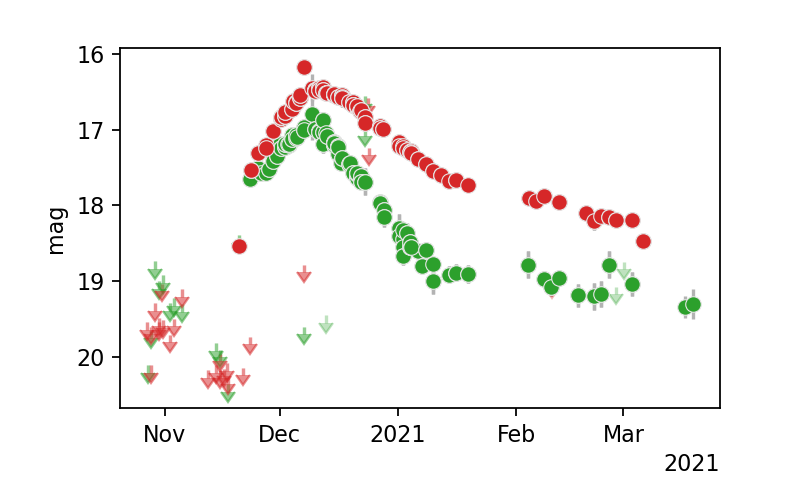

In [23]:
%matplotlib notebook
_ = fritz_lc.show()

### filtering the lightcurve data using `get_data()`
Say you want to data in the g band observed in december 2020.

In [28]:
fritz_lc.get_data(filters="ztfg", time_range=["2020-12-01", "2021-01-01"])

,obj_id,ra,dec,filter,mjd,instrument_id,instrument_name,ra_unc,dec_unc,origin,id,groups,mag,magerr,magsys,limiting_mag
56,ZTF20acrzwvx,81.193394,-15.942112,ztfg,59184.230139,1,ZTF,None,None,,3790897,"[1, 3, 43, 49, 63, 80, 20, 214, 215]",17.186350,0.068987,ab,18.558872
59,ZTF20acrzwvx,81.193394,-15.942112,ztfg,59184.230139,1,ZTF,None,None,,3810947,"[3, 43, 49, 51, 63, 80, 214, 215, 235]",17.186300,0.068987,ab,18.558901
61,ZTF20acrzwvx,81.193378,-15.942060,ztfg,59184.420914,1,ZTF,None,None,,3834306,"[1, 3, 41, 43, 49, 63, 80, 20, 214, 215]",17.244839,0.052091,ab,18.966116
64,ZTF20acrzwvx,81.193378,-15.942060,ztfg,59184.420914,1,ZTF,None,None,,3840712,"[1, 124, 3, 41, 43, 49, 51, 63, 80, 214, 215, ...",17.244801,0.052091,ab,18.966101
66,ZTF20acrzwvx,81.193375,-15.942089,ztfg,59185.296099,1,ZTF,None,None,,3901082,"[1, 3, 43, 49, 63, 80, 20, 214, 215]",17.221216,0.052681,ab,19.209650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,ZTF20acrzwvx,81.193445,-15.942112,ztfg,59211.226157,1,ZTF,None,None,,8853251,"[1, 3, 43, 49, 51, 63, 80, 20, 214, 215, 235]",18.149204,0.137078,ab,18.573872
243,ZTF20acrzwvx,81.193445,-15.942112,ztfg,59211.226157,1,ZTF,None,None,,8935203,"[3, 43, 49, 51, 63, 80, 214, 215, 217, 235]",18.149200,0.137078,ab,18.573900
321,ZTF20acrzwvx,NaN,NaN,ztfg,59190.411100,1,ZTF,None,None,,12841906,"[1, 20]",NaN,NaN,ab,19.605101
323,ZTF20acrzwvx,NaN,NaN,ztfg,59206.315509,1,ZTF,None,None,,12841908,"[1, 20]",NaN,NaN,ab,16.557301


***
# Case 2: Source 

We will use the `fritz.download_source()` for accessing single source information. It returns a complicated dictionary, but ztfquery.fritz has a useful object `FritzSource` that parses it. We will use it, it contains:

- `view_on_fritz()`: open your browser at the target page.
- `get_time()`: start and end of the detection
- `get_coordinates()`: RA, Dec of the source
- `get_redshift()`: redshift (as set by the users) ; see full=True option
- `get_classification()`: transient classification (as set by the users) ; see full=True option
- `get_classification()`: transient classification (as set by the users) ; see full=True option
- `get_annotation()`: annotation on fritz. 


#### Initializing the source object
You can also use the following for directly loading the object. (equivalent to `fritz.download_source(name, get_object=True)`:

```python
source = fritz.FritzSource.from_name(name)
```


In [6]:
source = fritz.download_source("ZTF20acrzwvx", get_object=True)
# or source = fritz.FritzSource.from_name(name)

In [7]:
source.get_redshift(full=False)

0.009954

In [8]:
source.get_coordinates()

(81.19348, -15.9420729)

In [9]:
source.get_time(format="jd")

{'created_at': 2459174.462662037, 'last_detected_at': 2459292.6450694446}

In [10]:
source.view_on_fritz() # opens a webpage.

True

***
# Step 3: Alerts

You can access the Alerts issued by ZTF and stored by fritz. Simply use `download_alerts()`.
You can use the `allfields=True` options to get the maximum information, it is not so much slower. It returns a complex json list of dict. 

You are invited to use the `FritzAlerts` object to simply parse these alerts. Only the `candidate` section is used but it contains all the relevant information. 


The main attributes of `FritzAlerts` simply is:
- `self.data`: A dataframe version of the candidate of the alerts

Based on that several methods are made:
- `get_keys()`: get anykey you want, you can get grouped version per band and any other keys. 
- `get_coordinates()`: shortcut to get_keys() for the ra, dec entries
- `get_ccpos()`: shortcut to get_keys() for xpos and ypos entries
- `get_lightcurve()`: get the subpart of the data related to lightcurves information. could be psf/ap/apbig see options
- `show_lc()`: call get_lightcurve() and plots it.

#### Initializing the alert object
You can also use the following for directly loading the object. (equivalent to `fritz.download_alerts(name, get_object=True, allfields=True)`:

```python
alert = fritz.FritzAlerts.from_name(name)
```

### Example

In [11]:
alert = fritz.download_alerts("ZTF20acrzwvx", get_object=True, allfields=True)
# or alert = fritz.FritzAlerts.from_name(name)

In [12]:
alert.data.head()

,jd,fid,pid,diffmaglim,pdiffimfilename,programpi,programid,isdiffpos,tblid,nid,...,zpmed,clrmed,clrrms,neargaia,neargaiabright,maggaia,maggaiabright,exptime,drb,drbversion
candid,,,,,,,,,,,,,,,,,,,,,
1422399503615015011,2.459177e+06,2,1422399503615,20.363220,ztf_20201123399491_000305_zr_c10_o_q1_scimrefd...,Kulkarni,1,t,11,1422,...,26.316000,0.584,0.293708,10.831936,-999.0,19.150648,-999.0,30.0,1.000000,d6_m7
1422372003615015013,2.459177e+06,1,1422372003615,20.641665,ztf_20201123372002_000305_zg_c10_o_q1_scimrefd...,Kulkarni,1,t,13,1422,...,26.180000,0.580,0.293712,10.867114,-999.0,19.150648,-999.0,30.0,1.000000,d6_m7
1424330270815015008,2.459179e+06,2,1424330270815,19.969709,ztf_20201125330150_001348_zr_c03_o_q1_scimrefd...,Kulkarni,2,t,8,1424,...,26.330999,0.592,0.295014,10.816862,-999.0,19.150648,-999.0,30.0,0.999996,d6_m7
1424400213615015003,2.459179e+06,1,1424400213615,20.187954,ztf_20201125400220_000305_zg_c10_o_q1_scimrefd...,Kulkarni,1,t,3,1424,...,26.224001,0.573,0.283482,10.850582,-999.0,19.150648,-999.0,30.0,1.000000,d6_m7
1425240430815015003,2.459180e+06,1,1425240430815,19.054554,ztf_20201126240046_001348_zg_c03_o_q1_scimrefd...,Kulkarni,2,t,3,1425,...,26.150000,0.518,0.236254,10.953061,-999.0,19.150648,-999.0,30.0,0.999985,d6_m7


In [13]:
alert.get_coordinates(perband=True)

,ra,dec
fid,,
1,81.193395,-15.942092
2,81.193381,-15.942087


In [14]:
alert.get_ccdpos(perband=True, groupby="field")

xpos         ypos
field fid                          
305   1     748.340217  2650.494582
      2     748.012066  2651.345762
1348  1    1348.946564  1784.022807
      2    1336.386475  1769.840454

In [15]:
alert.get_lightcurve("ap").head() # default is "psf"

,jd,magap,sigmagap,fid
candid,,,,
1422399503615015011,2.459177e+06,17.586599,0.0391,2
1422372003615015013,2.459177e+06,17.611799,0.0323,1
1424330270815015008,2.459179e+06,17.269100,0.0375,2
1424400213615015003,2.459179e+06,17.529200,0.0404,1
1425240430815015003,2.459180e+06,17.448099,0.0659,1


In [16]:
alert.get_reference_timerange()

jdstartref      jdendref
field fid                            
305   1    2.458366e+06  2.458431e+06
      2    2.458369e+06  2.458433e+06
1348  1    2.458431e+06  2.459177e+06
      2    2.458433e+06  2.458862e+06

<IPython.core.display.Javascript object>


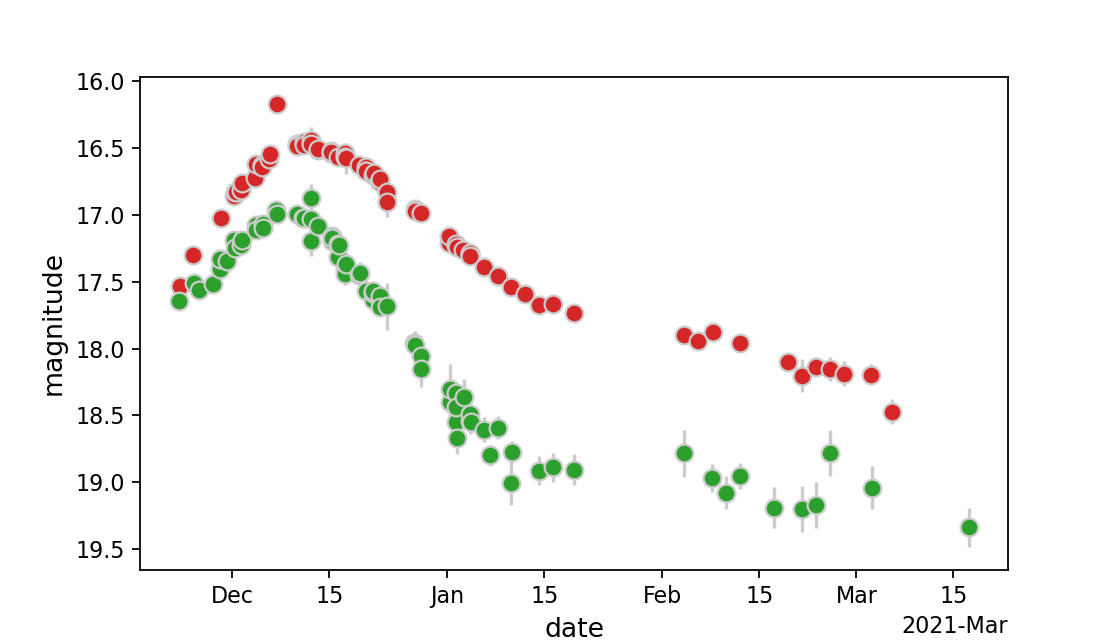

In [17]:
alert.show_lc()

***
# Case 4: Spectroscopy


To get the spectrum (or spectra) associated to a target we will use `fritz.download_spectra()`. 

The spectral information are given by fritz as list of dictionary containing the data. 

#### This is how it looks

In [2]:
spectral_info = fritz.download_spectra("ZTF20acrzwvx", get_object=False)

This target happens to have 2 spectra

In [3]:
len(spectral_info)

2

## FritzSpectrum 

The FritzSpectrum object enables to load individual object from fritz. It knows how to parse the fritz dictionaries. 

The main attributes are:
- `self.lbda`: the wavelength
- `self.flux`: the spectral flux
- `self.error`: error on the spectral flux (if any, see `self.has_error()`)
- `self.data`: the dataframe where these are coming from.
- `self.header`: addition information stored in the header (some are empty)

It exists several useful methods such as:
- `self.show()`: plot the spectrum

In [4]:
spec = fritz.FritzSpectrum(spectral_info[1])

In [5]:
spec.flux

array([6.445007e-16, 5.439798e-15, 3.646977e-15, ..., 1.233501e-15,
       1.056961e-15, 1.341646e-15])

In [6]:
spec.data

,lbda,flux
0,3620.310068,6.445007e-16
1,3621.463102,5.439798e-15
2,3622.616136,3.646977e-15
3,3623.769170,-2.749296e-15
4,3624.922204,3.522599e-15
...,...,...
5323,10277.442275,1.136734e-15
5324,10278.749700,1.038822e-15
5325,10280.057124,1.233501e-15
5326,10281.364548,1.056961e-15


In [7]:
spec.header # depending on the data uploaded to fritz, tis could be empty.

<IPython.core.display.Javascript object>


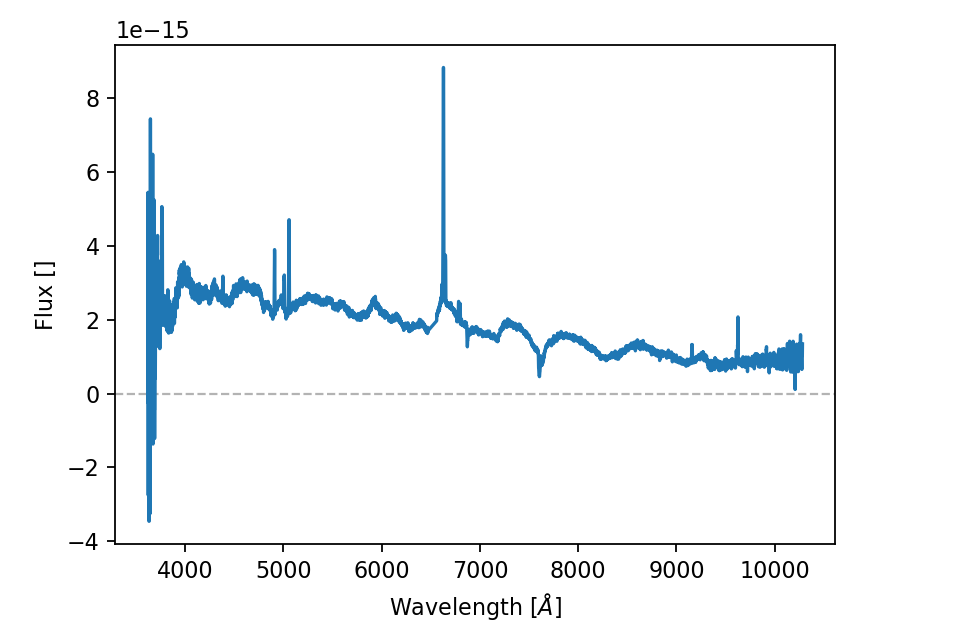

In [8]:
_ = spec.show()

## Storing, loading

The FritzSpectrum object has method to store and load data on several formats.

- `self.to_fits`: the classic astronomical format 
- `self.to_json`: data as given by fritz
- `self.to_acsii`: simple ascii file starting with header (# key: key) then data

You have the corresponding loading format (classmethod)
- `FritzSpectrum.read_fits()`:
- `FritzSpectrum.read_json()`:
- `FritzSpectrum.read_ascii()`:

they return a loaded instance reading the corresponding file.

#### For instance

In [9]:
spec.to_ascii("data/test.acsii")

In [10]:
spec2 = fritz.FritzSpectrum.read_ascii("data/test.acsii")

/Users/mrigault/opt/anaconda3/lib/python3.8/site-packages/ztfquery-1.13.1-py3.8.egg/ztfquery/fritz.py:1249: UserWarning: Cannot parse the input name, so information (instrument, obj_id) might be missing
  warnings.warn("Cannot parse the input name, so information (instrument, obj_id) might be missing")


<IPython.core.display.Javascript object>


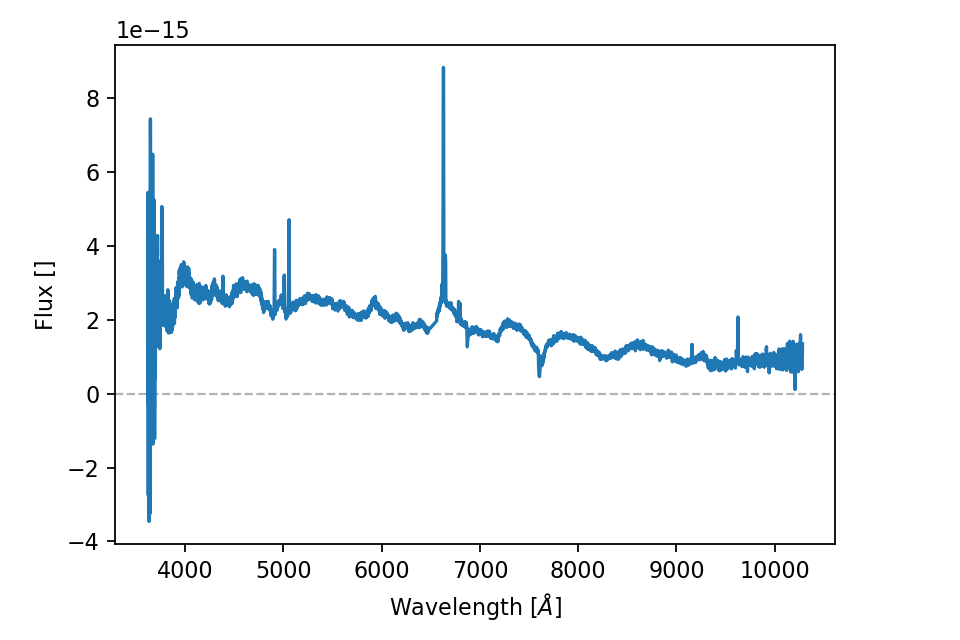

In [11]:
_ = spec2.show()

## Cases with several spectra

The `FritzSpectrum` object is meant to load 1 spectrum and not a list of spectra. The `FritzSpectra` object is not supported anymore as it did not provide useful additional methods.

Hence, if you have several spectra downloaded from fritz, the `get_object=True` option of `fritz.download_spectra("ZTF20acrzwvx", get_object=True)` will return a list of spectra. 

This similar behavior is to expect from `FritzSpectrum.from_name()` even though this would not be expected from a python classmethod. Hence a warning will be issues (turn it off using the `warn=False` option).

In [12]:
spectra = fritz.download_spectra("ZTF20acrzwvx", get_object=True)

In [22]:
spectra = fritz.FritzSpectrum.from_name("ZTF20acrzwvx")

/Users/mrigault/opt/anaconda3/lib/python3.8/site-packages/ztfquery-1.13.1-py3.8.egg/ztfquery/fritz.py:1176: UserWarning: ZTF20acrzwvx as several spectra, list of FritzSpectrum returned
  warnings.warn(f"{name} as several spectra, list of FritzSpectrum returned")


In [23]:
len(spectra)

2

<IPython.core.display.Javascript object>


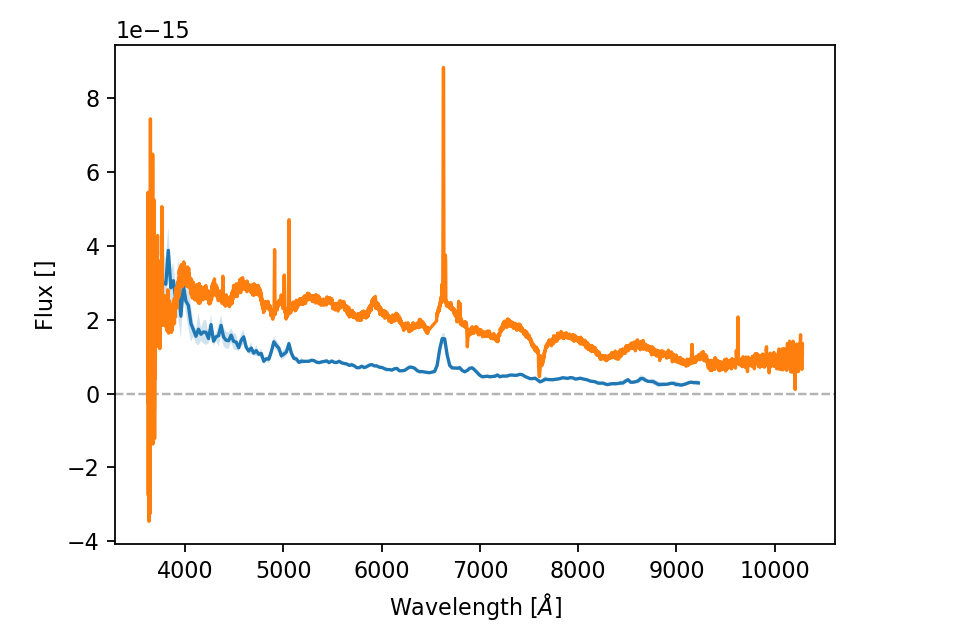

In [21]:
fig = spectra[0].show()
ax = fig.axes[0]

_ = spectra[1].show(ax=ax, color="C1")

***
# Extra
***
# Plotting a ligtcurves from scratch

In [19]:
datafritz = fritz.download_lightcurve("ZTF20acrzwvx")

### we are going to plot: band per band the detected points and the upperlimits.

In [28]:
filters = datafritz["filter"].unique()
filters

array(['ztfr', 'ztfg'], dtype=object)

First, show the detected points, then we will do the upper limit. Non detected values have `mag=NaN`

In [32]:
flag_notdetected = datafritz["mag"].isna() # boolean array, True=non-detected
data_detected = datafritz[~flag_notdetected]
data_undetected = datafritz[flag_notdetected]

#### pandas remark: 
`data_detected[data_detected["filter"]==filt_]` is faster than the dataframe.query()

<IPython.core.display.Javascript object>


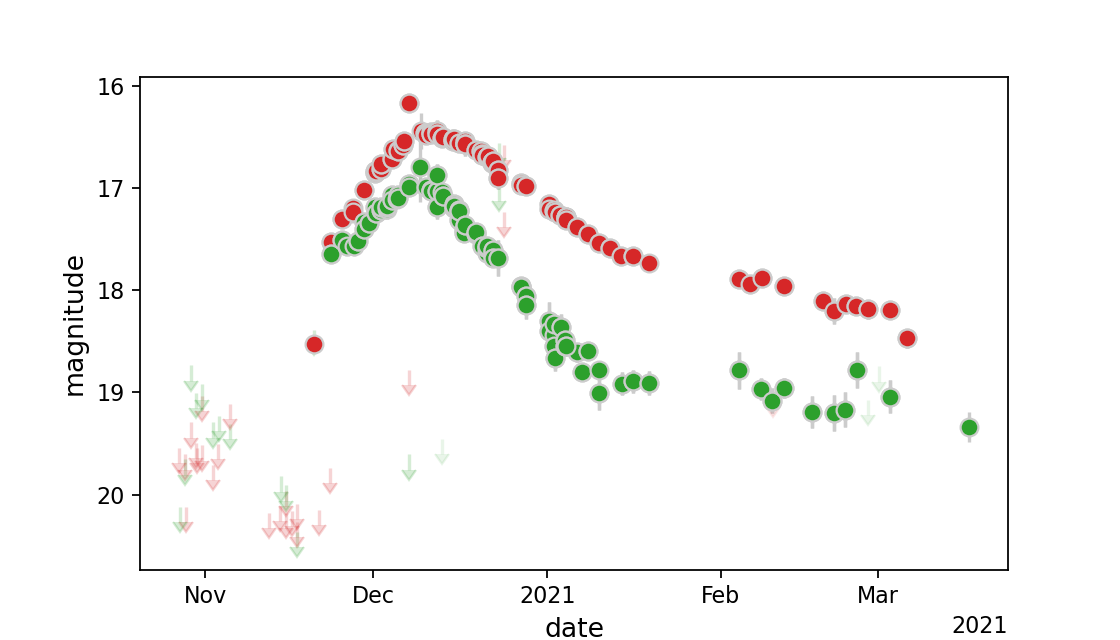

Text(0.5, 0, 'date')

In [60]:
import matplotlib.pyplot as mpl
fig = mpl.figure(figsize=[7,4])
ax = fig.add_subplot(111)

ZTFCOLOR = {"ztfr":"tab:red", "ztfg":"tab:green", "ztfi":"tab:orange"}

det_prop = dict(ls="None", marker="o", ms=8, ecolor="0.8", mec="0.8")


#
# x-axis trick
# We are going to use `datetime` format for the x-axis to use fancy matplotlib tools.
# if you don't care, you can simply use data_det_f["mjd"].
#
from astropy import time # to convert mjd in datetime
from matplotlib import dates as mdates # fancy x-axis
#



# Show the datapoints
for filt_ in filters:
    data_det_f = data_detected[data_detected["filter"]==filt_]
    
    date_ = time.Time(data_det_f["mjd"], format="mjd").datetime
    # date_ = data_det_f["mjd"] # if not fancy matplotlib
    ax.errorbar(date_, data_det_f["mag"], yerr=data_det_f["magerr"],
                color=ZTFCOLOR[filt_], **det_prop)
    
    
# low mag means bright
ax.invert_yaxis()

undet_prop = dict(ls="None", label="_no_legend_", lolims=True, alpha=0.1)

for filt_ in filters:
    data_undet_f = data_undetected[data_undetected["filter"]==filt_]
    date_ = time.Time(data_undet_f["mjd"], format="mjd").datetime
    ax.errorbar(date_, data_undet_f["limiting_mag"], 
                yerr=0.15, color=ZTFCOLOR[filt_], **undet_prop)

    
    
# Fancy matplotlib dates
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)


# Labels
ax.set_ylabel("magnitude", fontsize="large")
ax.set_xlabel("date", fontsize="large")

***
# Credits:

Tutorial made by M. Rigault (m.rigault@ipnl.in2p3.fr)

If you have used ztfquery in any point of you research work, please cite https://ui.adsabs.harvard.edu/abs/2018zndo...1345222R/abstract. 

**Citations are important as they enable to justify the time spent to build code like this one to funding agencies.**


### Acknowledgements:

*The ztfquery code was funded by the European Research Council (ERC) under the European Union's Horizon 2020 research and innovation programme (grant agreement n°759194 - USNAC, PI: Rigault).*
***